# bQTL motif distance vs p-value
- examine the bQTL SNPs from bQTL paper for JUND (mmc2.xlsx, jund tab)
- take first 10k entries of smallest pvals
- plot bQTL SNP distance from nearest modisco seqlets supporting a pattern vs -log10(pval)

In [1]:
from __future__ import print_function, division

import sys
import os
#import matplotlib as mpl
#mpl.use('Agg')

import numpy as np
import sys
import argparse



In [2]:

MAX_LOC = 250000000L
def chrom_to_idx(chrom, loc):
    chrid = chrom[3:]
    if chrid == 'x' or chrid == 'X':
        chrnm = 23
    elif chrid == 'y' or chrid == 'Y':
        chrnm = 24
    else:
        chrnm = int(chrid)
    return long(chrnm * MAX_LOC + loc)

def idx_to_chrom(idx):
    loc = idx % MAX_LOC
    chrid = int(idx / MAX_LOC)
    if chrid == 23:
        chrom = 'chrX'
    elif chrid == 24:
        chrom = 'chrY'
    else:
        chrom = 'chr' + str(chrid)
    return chrom, loc
        
    
def calc_seq_loc(seq):
    st = seq.coor.start
    en = seq.coor.end
    local = int((st + en)/2) # fix later using center of gravity

    tsv = merged_tsv_list[seq.coor.example_idx]
    location = int(tsv[1]) + local
    if location > MAX_LOC:
        print("location=%d, tsv_start=%d, ex=%d, st=%d, en=%d" %(location, int(tsv[1]), seq.coor.example_idx, seq.coor.start, seq.coor.end))
        print(tsv)
    idx = chrom_to_idx(tsv[0], location)

    return idx, tsv[0], location



In [13]:
from collections import OrderedDict
chromlist = [ "chr"+str(i) for i in range(1,22)] + ["chrX", "chrY"]
#chromlist = [ "chr1", "chr2"]

chromDict = OrderedDict()

for chrom in chromlist:
    with open("data/sort_"+chrom + ".txt") as in_fh:
        lines = [ line.split(' ') for line in in_fh ]
        chromDict[chrom] = list(zip(*lines)) # transpose
        print(chrom + " done")
            

chr1 done
chr2 done
chr3 done
chr4 done
chr5 done
chr6 done
chr7 done
chr8 done
chr9 done
chr10 done
chr11 done
chr12 done
chr13 done
chr14 done
chr15 done
chr16 done
chr17 done
chr18 done
chr19 done
chr20 done
chr21 done
chrX done
chrY done


In [8]:
"""
from bisect import bisect_left
max_chrid = 25
bounds  = [0] * (max_chrid+1)
for chrid in range(1, max_chrid+1):
    lo_val = chrid * MAX_LOC
    bounds[chrid-1] = bisect_left(idx_array, lo_val)
    #print(chrid-1, lo_val, bounds[chrid-1])

print(bounds)
print(MAX_LOC)

def find_nearest(my_list, my_idx):
    '''
    Assumes my_list is sorted. Returns closest value to my_idx.
    If two numbers are equally close, return the smallest number.
    If lo
    '''

    chrid = long(my_idx / MAX_LOC)
    lo = bounds[chrid-1]
    hi = bounds[chrid]
    if lo == hi:
        return -1, my_list[lo] # this chrom is empty
    
    # lo != hi, so the chrom is not empty
    pos = bisect_left(my_list, my_idx, lo=lo, hi=hi)

    if pos == lo:
        return lo, my_list[lo]
    if pos == hi:
        return hi-1, my_list[hi-1] # hi belongs to next chrom
    before = my_list[pos - 1]
    after = my_list[pos]
    #print(lo, hi, pos, before, after)
    if after - my_idx < my_idx - before:
       return pos, after
    else:
       return pos-1, before
"""

NameError: name 'idx_array' is not defined

In [16]:

from bisect import bisect_left
max_chrid = 25

print(MAX_LOC)

def find_nearest(my_list, my_idx):
    """
    Assumes my_list is sorted. Returns closest value to my_idx.
    If two numbers are equally close, return the smallest number.
    If lo
    """

    
    chrid = long(my_idx / MAX_LOC)

    lo = chrid * MAX_LOC
    hi = lo + MAX_LOC    

    # lo != hi, so the chrom is not empty
    pos = bisect_left(my_list, my_idx, lo=lo, hi=hi)

    if pos == lo:
        return lo, my_list[lo]
    if pos == hi:
        return hi-1, my_list[hi-1] # hi belongs to next chrom
    before = my_list[pos - 1]
    after = my_list[pos]
    #print(lo, hi, pos, before, after)
    if after - my_idx < my_idx - before:
       return pos, after
    else:
       return pos-1, before

250000000


In [19]:
import math

#snp_dir = "/Users/kat/kundajelab/tmp/bQTL/bQTL_all_SNPs/"
snp_dir = "/home/ktian/kundajelab/tfnet/results/nandi/bQTL/analysis/bQTL_all_SNPs/"
snp_file = "JUND_10k.txt"
snp_list = []
with open(snp_dir + snp_file) as in_fh:
    header = next(in_fh)
    line_num = 0
    for line in in_fh:
        fields = line.split('\t')
        snp_chrom = fields[0]
        snp_pos   = int(fields[1])
        pval  = float(fields[9])
        idx   = chrom_to_idx(snp_chrom, snp_pos)
        
        
        
        fields = chromDict[chrom]
        idx_array = fields[1]
        print(idx_array)
        motif_off, motif_idx = find_nearest(idx_array, idx)
        if motif_off >= 0:
            #snp_list.append([abs(idx-motif_idx), -math.log(pval), pval, idx, snp_chrom, snp_pos, line_num, motif_idx, motif_off])
            snp_list.append([abs(idx-motif_idx), -math.log(pval, 10)])
        line_num += 1
        if line_num > 10:
            break
print(snp_list[:5])     
print(len(snp_list))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IndexError: tuple index out of range

387


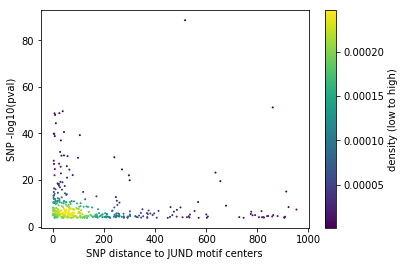

In [23]:
logging.basicConfig(
        format='%(asctime)s %(levelname)-5s %(message)s',
        level=logging.INFO,
        datefmt='%Y-%m-%d %H:%M:%S')


%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.stats import gaussian_kde

#fig=plt.figure(figsize=(10, 8), dpi= 100)
snp_dist = [item[0] for item in snp_list if item[1] > 0 and item[0] <= 1000]
snp_pval = [item[1] for item in snp_list if item[1] > 0 and item[0] <= 1000]

x=snp_dist
y=snp_pval
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

print(len(snp_dist))
plt.scatter(snp_dist, snp_pval, 1, c=z, alpha=1, marker='o', label=".")
plt.xlabel("SNP distance to JUND motif centers")
plt.ylabel("SNP -log10(pval)")
plt.colorbar(label='density (low to high)')

#plt.legend(loc=2)
plt.show()    

# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib


743


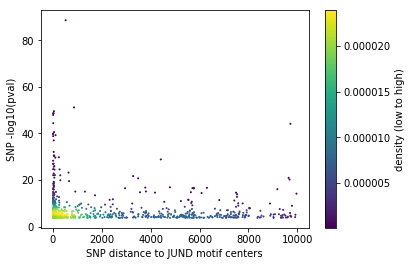

In [24]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.stats import gaussian_kde

#fig=plt.figure(figsize=(10, 8), dpi= 100)
snp_dist = [item[0] for item in snp_list if item[1] > 0 and item[0] <= 10000]
snp_pval = [item[1] for item in snp_list if item[1] > 0 and item[0] <= 10000]

x=snp_dist
y=snp_pval
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

print(len(snp_dist))
plt.scatter(snp_dist, snp_pval, 1, c=z, alpha=1, marker='o', label=".")
plt.xlabel("SNP distance to JUND motif centers")
plt.ylabel("SNP -log10(pval)")
plt.colorbar(label='density (low to high)')

#plt.legend(loc=2)
plt.show()    

# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
